In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v0')

In [3]:
N_ADJUST = 1000
N_EPISODE = 100
EPS = 0.05
GAMMA = 0.9

In [4]:
def get_action(s, weights):
    return 1 if s.dot(weights) > 0 else 0

In [10]:
def play_one_episode(env, params, render=False):
    s = env.reset()
    done = False
    t = 0
    
    while not done and t < 10000:
        if render:
            env.render()
        t += 1
        a = get_action(s, params)
        s, reward, done, info = env.step(a)
    
    return t

In [11]:
def play_multiple_episode(env, T, params):
    episode_lengths = np.empty(T)
    
    for i in range(T):
        episode_lengths[i] = play_one_episode(env, params)
        
    return episode_lengths.mean()

In [12]:
def random_search(env):
    episode_lengths = []
    best = 0
    params = None
    for t in range(1000):
        new_params = np.random.randn(4)
        avg_length = play_multiple_episode(env, 100, new_params)
        episode_lengths.append(avg_length)
        
        if(avg_length > best):
            params = new_params
            best = avg_length
            print(t, best)
    return episode_lengths, params

In [13]:
episode_lengths, params = random_search(env)

0 9.31
2 40.13
4 118.6
12 180.37
54 199.31
77 200.0


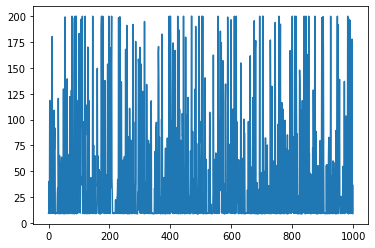

In [14]:
plt.plot(episode_lengths)

In [16]:
play_one_episode(env, params, True)

200

In [17]:
env.close()